In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization
import visualkeras

In [3]:
labels_csv = pd.read_csv('E:\\dx\\Level 6\\Project\\Topic-Ensemble Model for the Classification of Dog Breed\\\Codes\\Dog-Breed-Classification-using-Ensemble-Pretrained-Models-main\\labels.csv')
labels_csv['id'] = [str(fname) + '.jpg' for fname in labels_csv['id']]
data_train = pathlib.Path('E:\\dx\\Level 6\\Project\\Topic-Ensemble Model for the Classification of Dog Breed\\Dataset\\120dog breeds-224\\train')
data_test = pathlib.Path('E:\\dx\\Level 6\\Project\\Topic-Ensemble Model for the Classification of Dog Breed\\Dataset\\120dog breeds-224\\train')

In [4]:
batch_size = 16
img_size = 224

In [5]:
datagen = ImageDataGenerator(preprocessing_function = keras.applications.inception_v3.preprocess_input, validation_split=0.2)
train_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset='training',
                        x_col='id',
                        y_col='breed',
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode='sparse',
                        color_mode='rgb',
                        target_size=(img_size, img_size))

validation_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset='validation',
                        x_col='id',
                        y_col='breed',
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode='sparse',
                        color_mode='rgb',
                        target_size=(img_size, img_size))

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [6]:
base = applications.inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(224,224,3))

for layer in base.layers:
    layer.trainable=False

model = Sequential()
model.add(base)
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
model.summary()

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 batch_normalization_94 (Bat  (None, 5, 5, 2048)       8192      
 chNormalization)                                                
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0

In [7]:
history_inc = model.fit(train_generator, epochs=20, verbose = 1,
                        validation_data=validation_generator)

Epoch 1/20
512/512 [==============================] - 233s 444ms/step - loss: 2.8563 - accuracy: 0.3881 - val_loss: 0.8908 - val_accuracy: 0.7647
Epoch 2/20
512/512 [==============================] - 226s 441ms/step - loss: 1.1153 - accuracy: 0.7082 - val_loss: 0.7044 - val_accuracy: 0.7891
Epoch 3/20
512/512 [==============================] - 227s 443ms/step - loss: 0.8757 - accuracy: 0.7534 - val_loss: 0.6738 - val_accuracy: 0.7940
Epoch 4/20
512/512 [==============================] - 223s 435ms/step - loss: 0.7576 - accuracy: 0.7792 - val_loss: 0.6752 - val_accuracy: 0.7921
Epoch 5/20
512/512 [==============================] - 224s 438ms/step - loss: 0.6708 - accuracy: 0.7997 - val_loss: 0.6782 - val_accuracy: 0.7979
Epoch 6/20
512/512 [==============================] - 224s 438ms/step - loss: 0.6223 - accuracy: 0.8113 - val_loss: 0.6847 - val_accuracy: 0.7960
Epoch 7/20
512/512 [==============================] - 223s 436ms/step - loss: 0.5902 - accuracy: 0.8204 - val_loss: 0.6834 -

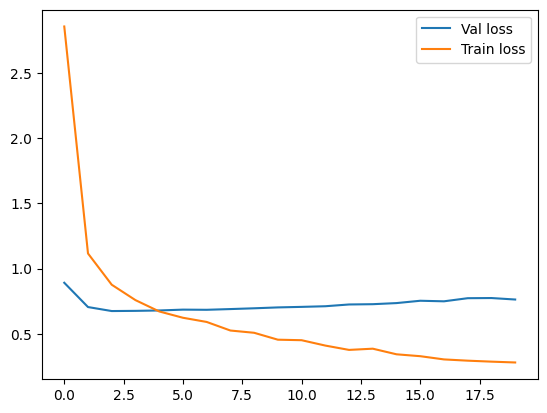

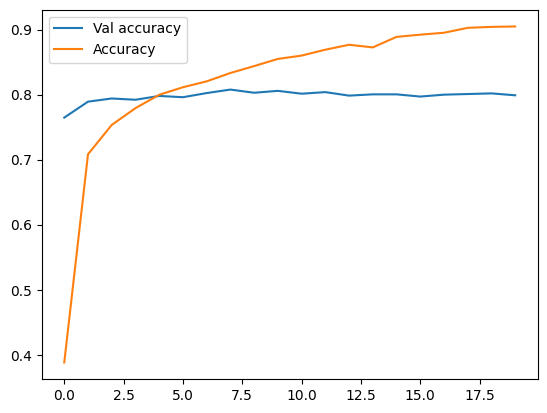

In [8]:
plt.figure()
plt.plot(history_inc .history['val_loss'], label = 'Val loss')
plt.plot(history_inc .history['loss'], label = 'Train loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(history_inc .history['val_accuracy'], label = 'Val accuracy')
plt.plot(history_inc .history['accuracy'], label = 'Accuracy')
plt.legend()
plt.show()

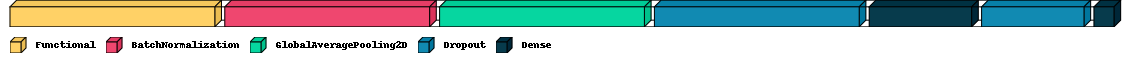

In [9]:
visualkeras.layered_view(model,  legend=True)